### imports


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [5]:
# Load your data
df = pd.read_csv('../data/data.csv')  # Replace with your actual file path

# Model Selection and Training

### Split the Data

In [18]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
X = df.drop('FraudResult', axis=1)
y = df['FraudResult']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Choose Models

In [7]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'GBM': GradientBoostingClassifier(random_state=42)
}

### Train the Models

In [16]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Random Forest trained.
GBM trained.


# GBM Model

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(max_iter=50, max_depth=3)
import joblib

# Step 1: Load your dataset (replace 'your_file.csv' with your actual dataset file)
data = pd.read_csv('../data/data.csv')

# Step 2: Identify columns with non-numeric values
non_numeric_columns = data.select_dtypes(include=['object']).columns

# Step 3: Apply One-Hot Encoding to categorical columns
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), non_numeric_columns)
    ], 
    remainder='passthrough'  # Keep other columns as they are
)

# Step 4: Split your data into features (X) and target (y)

X = data.drop(columns=['FraudResult'])  # Features (excluding the target column)
y = data['FraudResult']  # Target variable

# Now proceed with the rest of your preprocessing and model training as before

# Step 5: Apply the transformation
X_transformed = column_transformer.fit_transform(X)

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Step 7: Initialize and train the GBM model
gbm_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gbm_model.fit(X_train, y_train)

# Step 8: Save the trained GBM model
joblib.dump(gbm_model, 'gbm_model.pkl')

['gbm_model.pkl']

### Hyperparameter Tuning

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming X_train and y_train are already defined and preprocessed
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Optimized Random Forest Hyperparameter Tuning
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_param_dist = {
    'classifier__n_estimators': [100, 200, 500],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth': [10, 20, 50],
    'classifier__min_samples_split': [5, 10],
    'classifier__min_samples_leaf': [2, 4],
    'classifier__bootstrap': [True, False]
}

rf_random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=rf_param_dist,
    n_iter=30,  # Reduced number of iterations
    cv=3,  # Reduced cross-validation folds
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

rf_random_search.fit(X_train, y_train)
print("Best parameters from Random Search for Random Forest:", rf_random_search.best_params_)

# Optimized GBM Hyperparameter Tuning
gbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

gbm_param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__subsample': [0.8, 1.0]
}

gbm_random_search = RandomizedSearchCV(
    gbm_pipeline,
    param_distributions=gbm_param_dist,
    n_iter=20,  # Reduced number of iterations
    cv=3,  # Reduced cross-validation folds
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

gbm_random_search.fit(X_train, y_train)
print("Best parameters from Random Search for GBM:", gbm_random_search.best_params_)

Best parameters from Random Search for Random Forest: {'classifier__n_estimators': 500, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 50, 'classifier__bootstrap': False}
Best parameters from Random Search for GBM: {'classifier__subsample': 1.0, 'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1}


### **Random Forest** as the **Best** Model: 
- Given its parameters, it seems likely to perform well across various metrics, especially if it has been validated with good performance on a hold-out test set. However, this should be confirmed by looking at actual performance metrics like accuracy, precision, recall, F1 score, and ROC-AUC on your test data.

# Model Evaluation


Random Forest Performance:
Accuracy: 0.9980
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.9315

GBM Performance:
Accuracy: 0.9980
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.9368

Comparison of Metrics:
Model               Accuracy  Precision Recall    F1 Score  ROC AUC   
----------------------------------------------------------------------
Random Forest       0.9980    0.0000    0.0000    0.0000    0.9315    
GBM                 0.9980    0.0000    0.0000    0.0000    0.9368    

Best Model: GBM (Based on ROC AUC)
GBM Metrics: {'Accuracy': 0.9980487124986933, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0, 'ROC AUC': np.float64(0.9368235694585065)}

GBM might require further tuning. Consider these parameter adjustments:
- Increase 'n_estimators' to capture more complexity.
- Adjust 'learning_rate' lower if overfitting is suspected, or higher if underfitting.
- Increase 'max_depth' for more complex trees, but watch for overfitting.
- Experiment with

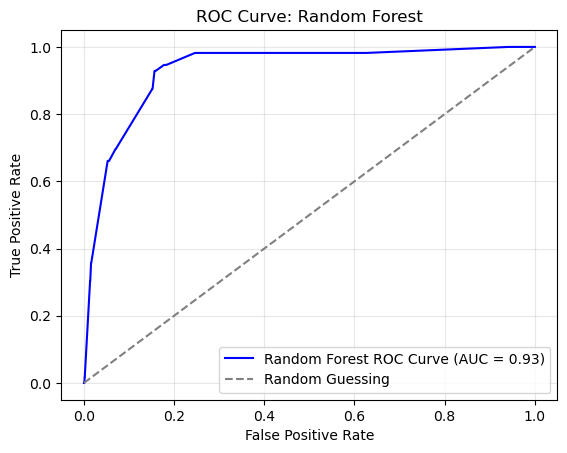

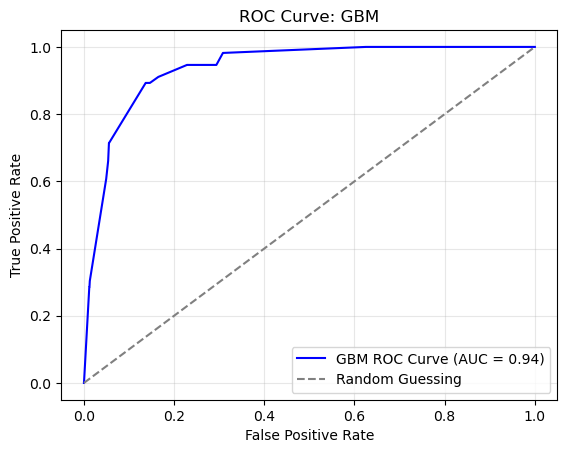

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to evaluate models and return performance metrics
def evaluate_model(model, X_test, y_test, model_name):
    # Predict class labels
    y_pred = model.predict(X_test)
    # Predict probabilities for the positive class
    y_pred_proba = (
        model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    )
    
    # Calculate performance metrics
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, zero_division=0),
        "ROC AUC": roc_auc_score(y_test, y_pred_proba),
    }
    
    # Print performance metrics
    print(f"\n{model_name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    return metrics

# Evaluate both models
rf_metrics = evaluate_model(rf_random_search.best_estimator_, X_test, y_test, "Random Forest")
gbm_metrics = evaluate_model(gbm_random_search.best_estimator_, X_test, y_test, "GBM")

# Compare models and identify the best one based on a primary metric (e.g., ROC AUC)
comparison_metric = "ROC AUC"  # Change this to use a different primary metric for comparison
rf_score = rf_metrics[comparison_metric]
gbm_score = gbm_metrics[comparison_metric]

best_model_name = "Random Forest" if rf_score > gbm_score else "GBM"
best_model_metrics = rf_metrics if rf_score > gbm_score else gbm_metrics

# Print a comprehensive comparison table
print("\nComparison of Metrics:")
header = f"{'Model':<20}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'F1 Score':<10}{'ROC AUC':<10}"
print(header)
print("-" * len(header))
print(f"{'Random Forest':<20}{rf_metrics['Accuracy']:<10.4f}{rf_metrics['Precision']:<10.4f}{rf_metrics['Recall']:<10.4f}{rf_metrics['F1 Score']:<10.4f}{rf_metrics['ROC AUC']:<10.4f}")
print(f"{'GBM':<20}{gbm_metrics['Accuracy']:<10.4f}{gbm_metrics['Precision']:<10.4f}{gbm_metrics['Recall']:<10.4f}{gbm_metrics['F1 Score']:<10.4f}{gbm_metrics['ROC AUC']:<10.4f}")

# Announce the best model
print(f"\nBest Model: {best_model_name} (Based on {comparison_metric})")
print(f"{best_model_name} Metrics: {best_model_metrics}")

# Additional guidance for further tuning if GBM underperforms
if best_model_name == "Random Forest":
    print("\nRandom Forest outperforms GBM. No further tuning suggested for GBM.")
else:
    print("\nGBM might require further tuning. Consider these parameter adjustments:")
    print("- Increase 'n_estimators' to capture more complexity.")
    print("- Adjust 'learning_rate' lower if overfitting is suspected, or higher if underfitting.")
    print("- Increase 'max_depth' for more complex trees, but watch for overfitting.")
    print("- Experiment with 'subsample' to introduce randomness and potentially reduce overfitting.")